# 🏡 Exploratory Data Analysis for Real Estate Pricing
By: NextHikes IT Solutions

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [7]:
df = pd.read_csv("housing_data (1).csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [8]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)
df.dropna(subset=['Electrical'], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_5520\3160008662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)


In [9]:
df['PricePerSqFt'] = df['SalePrice'] / df['GrLivArea']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

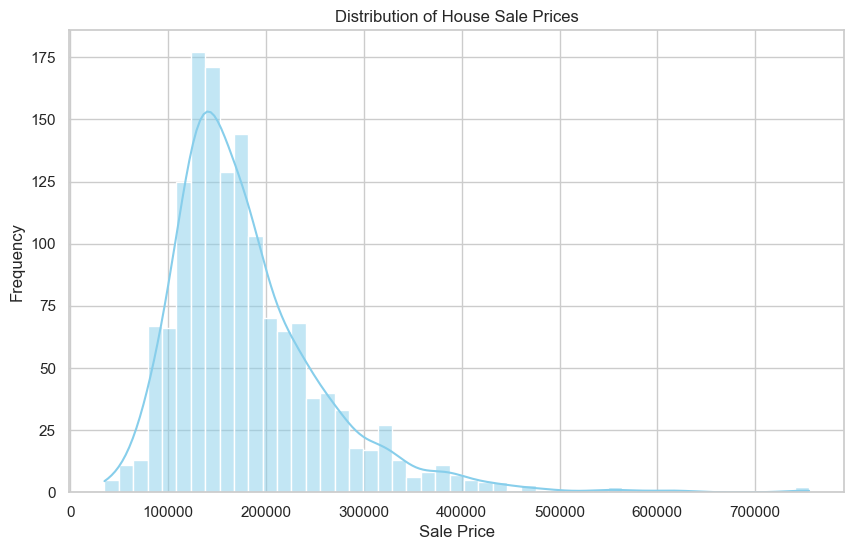

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution of House Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

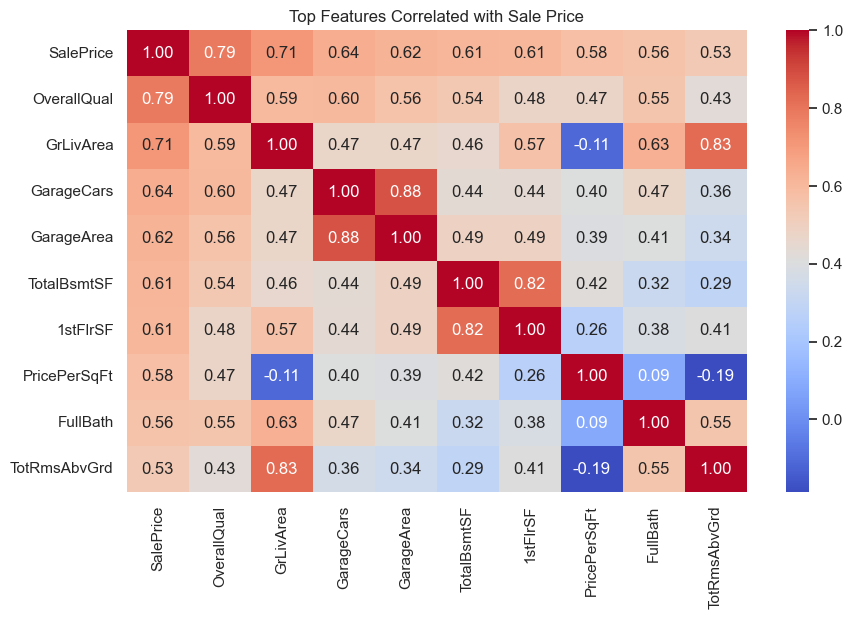

In [11]:
corr = df.corr(numeric_only=True)
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10).index
plt.figure(figsize=(10,6))
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Features Correlated with Sale Price")
plt.show()

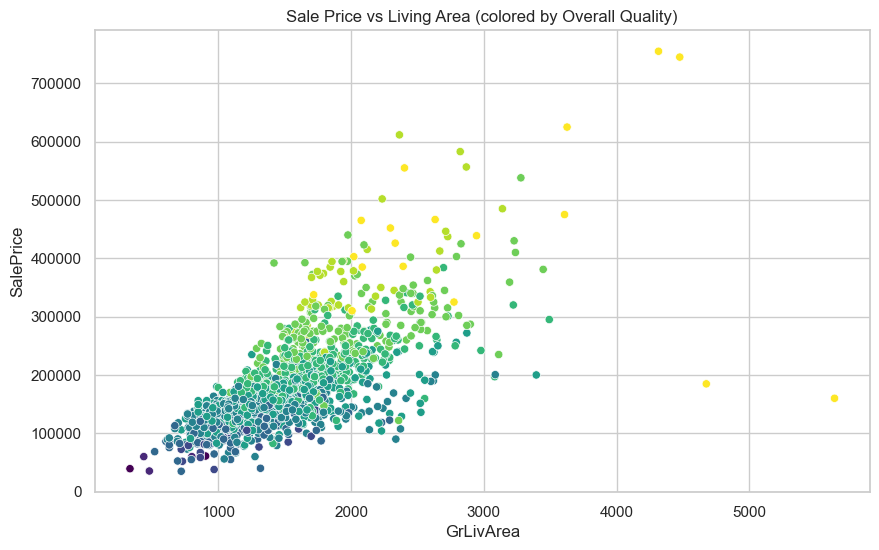

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', hue='OverallQual', palette='viridis', legend=False)
plt.title('Sale Price vs Living Area (colored by Overall Quality)')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5520\1073347797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='BedroomAbvGr', y='SalePrice', palette='Set2')


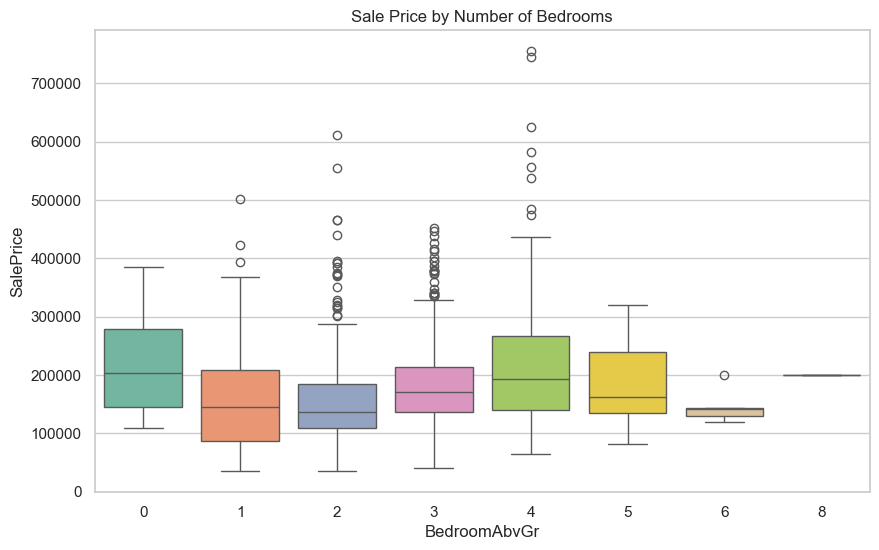

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='BedroomAbvGr', y='SalePrice', palette='Set2')
plt.title('Sale Price by Number of Bedrooms')
plt.show()

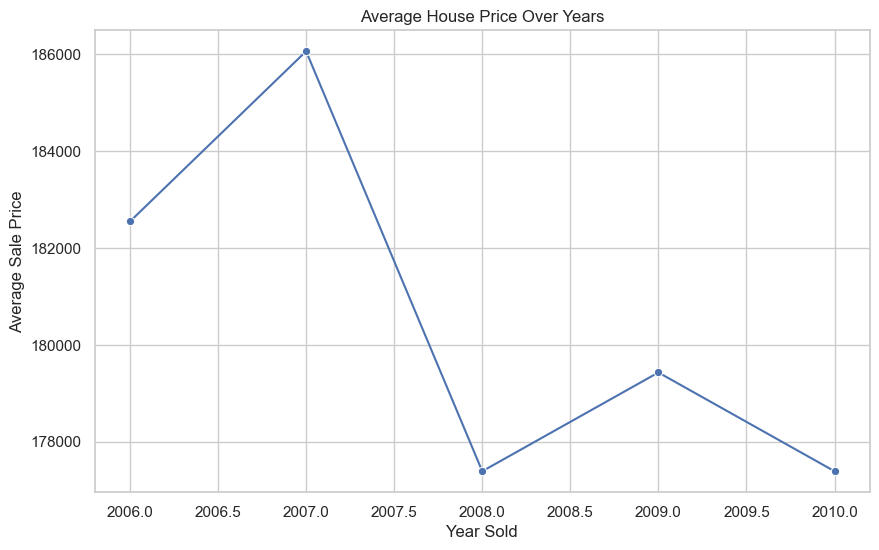

In [14]:
df['YrSold'] = df['YrSold'].astype(int)
avg_price_year = df.groupby('YrSold')['SalePrice'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_price_year, x='YrSold', y='SalePrice', marker='o')
plt.title('Average House Price Over Years')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.show()